# Credit Card Fraud Detection

## Description

Wtih the massive acceleration of e-commerce, online payment fraud has surged, costing businesses over $20 billion annually worldwide. For every dollar lost to fraud, businesses incur additional operational costs, network fees, and customer churn. To combat this evolving and sophisticated threat, businesses need effective fraud detection solutions that leverage the power of data and machine learning (ML).

This project aims to develop an Ml-powered fraud detection model capable of identifying fraudulent transactions. Traiditonal approaches to fraud detection often rely on brute-force rules, which can be rigid and prone to blocking legitimate transactions (false positives). In contrast, ML-based models can identify nuanced patterns that help businesses maximize revenue by striking a balance between false positives (blocking good customers and false negatives (allowing fraud to pass).

### Dataset Overview
The dataset sourced from Kaggle presents a simulated credit card transaction dataset containing genuine and fraudulent transactions from Jan 1, 2019 - Dec 31, 20202. The dataset presents a realistic challenge due to its imbalanced nature, the majority of transactions being legitimate. The presence of numerous categorical features and a large number of variables requires careful feature selection to identify the most important predictors of fraud. Key considerations for this model include:
* Imbalanced dataset: As the majority of transactions are not fraudulent, techniques such as oversampling, undersampling, or SMOTE will be explored to balance the dataset.
* Feature selection: Given the high number of features, identifying the most important variables will be crucial to model performance and efficiency.
* Handling categorical variables: Appropriate encoding strategies (e.g. one-hot encoding or target encoding) will be applied to convert categorical variables for the ML model.

### Key Components of the Project
1. Data Preprocessing: Cleaning the dataset, balancing the classes, handling missing values, and encoding categorical features.
2. Feature Engineering: Identifying the most predictive features, reducing dimensionality, and optimizing model performance.
3. Model Development: Implementing a fraud detection model using techniques like logistic regression, decision trees, random forests, or gradient boosting, with a focus on improving precision and recall.
4. Model Evaluation: Evaluating model performance using metrics such as F1 score, precision, recall, and the ROC-AUC curve to understand the trade-offs between false positives and false negatives.

The goal is to build a robust, adaptive fraud detection model that helps businesses prevent fraud efficiently while minimizing disruption to legitimate customer transactions.

Sources: 
* [Kaggle: Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)
* [Kaggle: Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Stripe: Risk Evaluation - Access the Stripe Radar risk evaluations in the Dashboard and the API](https://docs.stripe.com/radar/risk-evaluation)
* [Stripe: How Stripe uses ML for Fraud Detection](https://stripe.com/guides/primer-on-machine-learning-for-fraud-protection)
* [AWS: Banking Fraud Detection with Machine Learning and Real-time analytics on AWS](https://aws.amazon.com/blogs/industries/banking-fraud-detection-with-machine-learning-and-real-time-analytics-on-aws/)
* [Fine-tuned LLM on Fraud Detection](https://huggingface.co/Bilic/Mistral-7B-LLM-Fraud-Detection)

In [476]:
pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement imblearn==0.12.4 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.12.4
Note: you may need to restart the kernel to use updated packages.


In [477]:
# Or install these packages individually
!pip install folium
!pip install imblearn
!pip install -U matplotlib
!pip install numpy
!pip install openai
!pip install pandas
!pip install plotly
!pip install -U scikit-learn
!pip install scipy
!pip install seaborn
!pip install streamlit
!pip install watchdog
!pip install xgboost

In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [482]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

train_df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [557]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Data Imbalance Check

In [560]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [562]:
labels=["Genuine","Fraud"]

fraud_or_not = train_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
total = sum(values)
fraud_percent = fraud_or_not[0] / total * 100
non_fraud_percent = fraud_or_not[1] / total * 100
print(f"Total: {total}")
print(f"Non-fraudulent Transactions: {values[0]} or {fraud_percent: .2f}% of the dataset")
print(f"Fraudulent Transactions: {values[1]} or {non_fraud_percent: .2f}% of the dataset")


Total: 1296675
Non-fraudulent Transactions: 1289169 or  99.42% of the dataset
Fraudulent Transactions: 7506 or  0.58% of the dataset


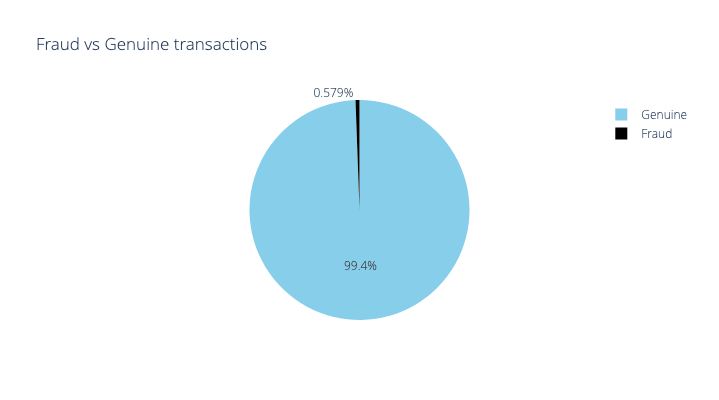

In [564]:
fig = px.pie(values=train_df["is_fraud"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

This pie chart below highlights the significant imbalance in our dataset, with the vast majority of transactions being non-fraudulent. Specifically, 

* 99.42% (1289169 / 1296675) of the data represents non-fraudulent transactions

* 0.58% (7506 / 1296675) are labeled as fraudulent.


This imbalance poses a challenge for model evaluation, as using accuracy as a performance metric could be misleading—yielding high accuracy simply due to the prevalence of non-fraudulent transactions. To ensure a more realistic assessment, we should consider alternative metrics like precision, recall, or F1-score, which better account for the minority class.

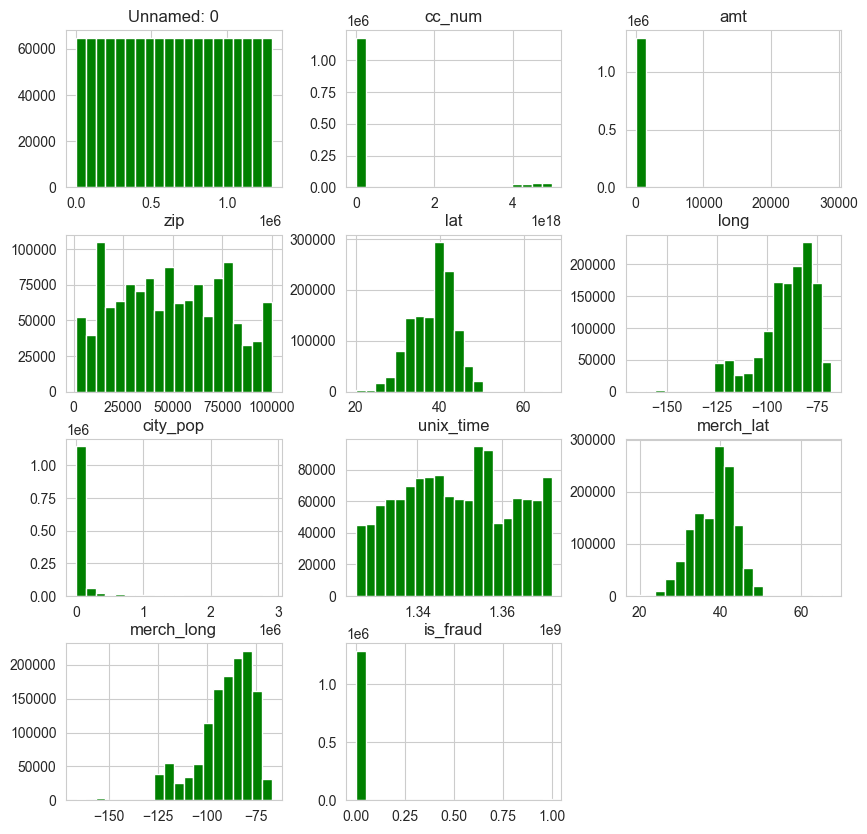

In [567]:
train_df.hist(bins = 20, figsize = (10,10), color = 'g');

In [ ]:
import folium

# Create a base map centered at the mean of latitude and longitude
map_fraud = folium.Map(location=[train_df['lat'].mean(), train_df['long'].mean()], zoom_start=1)

# Iterate through the DataFrame to add markers with different colors
for index, row in train_df.iterrows():
    # Set the marker color based on 'is_fraud' column
    marker_color = 'red' if row['is_fraud'] == 1 else 'blue'
    
    # Add a marker to the map
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=f"customer: {row['first']}, Fraud: {row['is_fraud']}",
        icon=folium.Icon(color=marker_color)
    ).add_to(map_fraud)

# Display the map
map_fraud

Text(0.5, 1.0, 'Amount Distribution by Fraud')

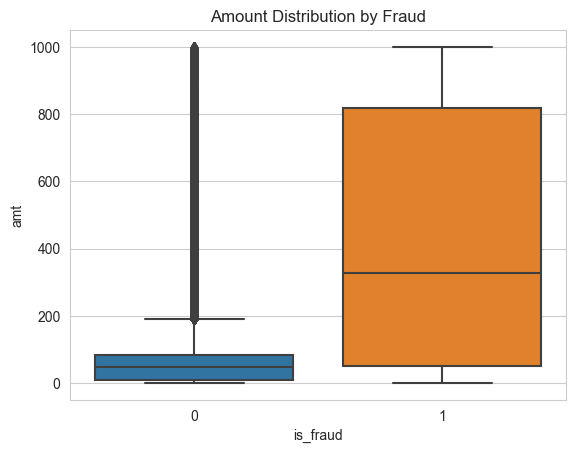

In [490]:
amount_df = train_df.query('amt < 1000')

sns.boxplot(x='is_fraud', y='amt', data=amount_df)
plt.title('Amount Distribution by Fraud')


## Preprocessing the data

### 1. Check and drop duplicated values

In [ ]:
# Display all duplicate rows
duplicates = df[df.duplicated(keep=False)]
duplicates

In [ ]:
# Remove all duplicates from the DataFrame
df_cleaned = df.drop_duplicates().reset_index()

In [ ]:
### 1. Separate features and target variables

In [ ]:
train_df.columns

TODO:
* Age: subtract trans date and dob
* Take the distance: use euclidean distance (lat, long)**2 - (mer_lat, mer_long)**2

In [ ]:
target = train_df['is_fraud']
target

## Display unique values in features and their counts

In [ ]:
uniq_values = train_df.nunique()
uniq_values

In [ ]:
fraud_df = train_df.query('is_fraud == 1')
fraud_df.head(2)

In [ ]:
# Calculate unique category counts
states_counts = fraud_df['state'].value_counts().reset_index()

# Rename columns for better readability
states_counts.columns = ['state', 'Count']

# Display the states counts
states_counts

In [ ]:
# Calculate unique job counts
job_counts = fraud_df['job'].value_counts().reset_index()

# Rename columns for better readability
job_counts.columns = ['job', 'Count']

# Display the states counts
job_counts

In [ ]:
# Calculate unique city counts
city_counts = fraud_df['city'].value_counts().reset_index()

# Rename columns for better readability
city_counts.columns = ['City', 'Count']

# Display the city counts
city_counts

,City,Count
0,Houston,39
1,Warren,33
2,Huntsville,29
3,Naples,29
4,Dallas,27
...,...,...
697,Florence,3
698,Kilgore,2
699,Phoenix,2
700,Phenix City,2


In [ ]:
# Calculate unique zip counts
zip_counts = fraud_df['zip'].value_counts().reset_index()

# Rename columns for better readability
zip_counts.columns = ['zip', 'Count']

# Display the city counts
zip_counts

,zip,Count
0,15010,24
1,48088,23
2,16034,21
3,82514,21
4,68375,19
...,...,...
749,33811,2
750,36869,2
751,85020,2
752,28405,2


In [ ]:
# Calculate unique category counts
category_counts = fraud_df['category'].value_counts().reset_index()

# Rename columns for better readability
category_counts.columns = ['category', 'Count']

# Display the city counts
category_counts

,category,Count
0,grocery_pos,1743
1,shopping_net,1713
2,misc_net,915
3,shopping_pos,843
4,gas_transport,618
5,misc_pos,250
6,kids_pets,239
7,entertainment,233
8,personal_care,220
9,home,198


In [ ]:
# Convert columns to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

# Extract the year from 'trans_date_trans_time' and 'dob'
train_df['trans_year'] = train_df['trans_date_trans_time'].dt.year
train_df['dob_year'] = train_df['dob'].dt.year

# Display the DataFrame with the extracted years
train_df[['trans_date_trans_time', 'dob', 'trans_year', 'dob_year']]
train_df['age'] = train_df['trans_year'] - train_df['dob_year']
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,dob_year,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1988,31
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1978,41
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1962,57
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1967,52
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1986,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020,1961,59
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020,1979,41
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020,1967,53
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020,1980,40


In [ ]:
# Convert columns to datetime
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

# Extract the year from 'trans_date_trans_time' and 'dob'
test_df['trans_year'] = test_df['trans_date_trans_time'].dt.year
test_df['dob_year'] = test_df['dob'].dt.year

# Display the DataFrame with the extracted years
test_df[['trans_date_trans_time', 'dob', 'trans_year', 'dob_year']]
test_df['age'] = test_df['trans_year'] - test_df['dob_year']
test_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,dob_year,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020,1968,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020,1990,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020,1970,50
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020,1987,33
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020,1955,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020,1966,54
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020,1999,21
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020,1981,39
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020,1965,55


In [ ]:
features = [
    'category', 
    'amt', 
    'age', 
    'gender',
    'job',
    # 'city',
    'state',
    # 'zip', 
    'lat', 
    'long',
    'merch_lat', 
    'merch_long'
]

train_features_pd = train_df[features]
test_features_pd = test_df[features]

train_features_pd

,category,amt,age,gender,job,state,lat,long,merch_lat,merch_long
0,misc_net,4.97,31,F,"Psychologist, counselling",NC,36.0788,-81.1781,36.011293,-82.048315
1,grocery_pos,107.23,41,F,Special educational needs teacher,WA,48.8878,-118.2105,49.159047,-118.186462
2,entertainment,220.11,57,M,Nature conservation officer,ID,42.1808,-112.2620,43.150704,-112.154481
3,gas_transport,45.00,52,M,Patent attorney,MT,46.2306,-112.1138,47.034331,-112.561071
4,misc_pos,41.96,33,M,Dance movement psychotherapist,VA,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,59,M,Geoscientist,UT,37.7175,-112.4777,36.841266,-111.690765
1296671,food_dining,51.70,41,M,"Production assistant, television",MD,39.2667,-77.5101,38.906881,-78.246528
1296672,food_dining,105.93,53,M,Naval architect,NM,32.9396,-105.8189,33.619513,-105.130529
1296673,food_dining,74.90,40,M,Volunteer coordinator,SD,43.3526,-102.5411,42.788940,-103.241160


### 3. Apply Categorical Encoding

In [ ]:
train_features_pd = pd.get_dummies(train_features_pd, columns=['category', 'gender', 'state', 'job'])
test_features_pd = pd.get_dummies(test_features_pd, columns=['category', 'gender', 'state', 'job'])

train_features_pd

,amt,age,lat,long,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,4.97,31,36.0788,-81.1781,36.011293,-82.048315,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,107.23,41,48.8878,-118.2105,49.159047,-118.186462,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,220.11,57,42.1808,-112.2620,43.150704,-112.154481,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,52,46.2306,-112.1138,47.034331,-112.561071,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,33,38.4207,-79.4629,38.674999,-78.632459,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,59,37.7175,-112.4777,36.841266,-111.690765,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,51.70,41,39.2667,-77.5101,38.906881,-78.246528,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,105.93,53,32.9396,-105.8189,33.619513,-105.130529,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,74.90,40,43.3526,-102.5411,42.788940,-103.241160,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


### 4. Scaling the dataset

In [393]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(train_features_pd)
X_test = scaler.fit_transform(test_features_pd)

print(X_train.shape, X_test.shape)

In [411]:
y_train = train_df['is_fraud']
y_test = test_df['is_fraud']

y_train

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

## Training the model

In [414]:
from sklearn.linear_model import LogisticRegression

In [416]:
lr_model = LogisticRegression(random_state=42)

In [418]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Prediction

In [421]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

ValueError: X has 550 features, but LogisticRegression is expecting 567 features as input.